In [1]:
!pip install scikit-learn
!pip install pandas
!pip install emoji
!pip install num2words
!pip install nltk
!pip install matplotlib
!pip install wordcloud
!pip install ipynb 
!pip install seaborn

In [2]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import emoji
from num2words import num2words
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('wordnet')
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
from matplotlib import colors
import pandas as pd
from ipynb.fs.full.preprocessor_class import Preprocessor
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tiast\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tiast\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
train_data = pd.read_csv('data/shuffled_train_data.csv',index_col=None)
train_labels = pd.read_csv('data/shuffled_train_labels.csv',index_col=None)

test_data = pd.read_csv('data/test_data.csv',index_col=None)
test_labels = pd.read_csv('data/test_labels.csv',index_col=None)

train_data_plot = pd.read_csv('data/train_data_plot.csv',index_col=None)
test_data_plot = pd.read_csv('data/test_data_plot.csv',index_col=None)

train_data.shape

(2100, 1)

In [4]:
preprocessor = Preprocessor(set(stopwords.words('romanian')),None, None, True, True, True, True, False, True, True, True, True, False, False)

preprocessed_data = pd.DataFrame(columns=['text'])

preprocessed_train_data = pd.DataFrame(columns=['text'])
preprocessed_test_data = pd.DataFrame(columns=['text'])

preprocessed_train_data['text'] = train_data.apply(lambda row: preprocessor.preprocess(row.iloc[0]), axis = 1)
preprocessed_test_data['text'] = test_data.apply(lambda row: preprocessor.preprocess(row.iloc[0]), axis = 1)

In [5]:
preprocessed_test_data['text'] = preprocessed_test_data['text'].apply(lambda x: ' '.join(map(str, x)))
preprocessed_test_data

,text
0,mare durere fizica simtita clasa ten stomatolo...
1,petitie asf impotriva speculei asiguratorilor ...
2,ride sharing plecat proteste redditori masini ...
3,apasa trimite refugiat sprit ten salvati gold ...
4,politia datoria scurt depus plangere politie m...
...,...
1320,sfat buna neboie sfat facut doza vaccin contra...
1321,boli mintale soferii tir dn1 locuit an jumatat...
1322,freelancer gasesc clienti gasesc client job fr...
1323,furata cunostinta spune probe suficiente furat...


In [6]:
preprocessed_train_data['text'] = preprocessed_train_data['text'].apply(lambda x: ' '.join(map(str, x)))
preprocessed_train_data

,text
0,rant ajuns cumparam originalul postare tip imp...
1,true grit secretul succesului evident ideile c...
2,experiente schimbat mentalitatea buna experien...
3,subreddit trebui numeasca r depresie casual ti...
4,ticalosilor entr acte unchiul scrie decat marc...
...,...
2095,mersul sala eticheta mno inceput merg sala tov...
2096,maine sala controla emotiile long story short ...
2097,stie gasesc granita italiana intors sicilia ma...
2098,somn permanenta stiu fac efectiv somn momentul...


In [7]:
best_f1 = 0
chosen_parameters = {}

for vocab in [1000,3000,5000]:
  for ij in range(1,4):
    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
      for gamma in ['scale', 'auto']:
        for c in [1, 100, 1000]:
            #initiate the TfidfVectorizer
            
            tfidf_vectorizer = TfidfVectorizer(max_features = vocab, ngram_range = (1,ij))
            train_tfidf = tfidf_vectorizer.fit_transform(preprocessed_train_data['text']) 
            test_tfidf = tfidf_vectorizer.transform(preprocessed_test_data['text']) 
            
            model = SVC(C = c, kernel = kernel, gamma = gamma)
            
            model.fit(train_tfidf, train_labels['label'])
            predictions = model.predict(test_tfidf)
            f1 = metrics.f1_score(test_labels['label'], predictions, average = 'macro')
    
            print('max_features: {} n_gram: {}  kernel: {}  gamma: {}  C: {}  f1: {}'.format(vocab, (1, ij), kernel, gamma, c, f1))
            
            if f1 > best_f1:
                best_f1 = f1
                chosen_parameters["max_features"] = vocab
                chosen_parameters["n_gram"] = (1, ij)        
                chosen_parameters["kernel"] = kernel
                chosen_parameters["gamma"] = gamma
                chosen_parameters["C"] = c

print(best_f1)
print(chosen_parameters)

max_features: 1000 n_gram: (1, 1)  kernel: linear  gamma: scale  C: 1  f1: 0.3507337258660368
max_features: 1000 n_gram: (1, 1)  kernel: linear  gamma: scale  C: 100  f1: 0.3944639821193067
max_features: 1000 n_gram: (1, 1)  kernel: linear  gamma: scale  C: 1000  f1: 0.3955354536581323
max_features: 1000 n_gram: (1, 1)  kernel: linear  gamma: auto  C: 1  f1: 0.3507337258660368
max_features: 1000 n_gram: (1, 1)  kernel: linear  gamma: auto  C: 100  f1: 0.3944639821193067
max_features: 1000 n_gram: (1, 1)  kernel: linear  gamma: auto  C: 1000  f1: 0.3955354536581323
max_features: 1000 n_gram: (1, 1)  kernel: poly  gamma: scale  C: 1  f1: 0.31090505186266165
max_features: 1000 n_gram: (1, 1)  kernel: poly  gamma: scale  C: 100  f1: 0.3156825662180636
max_features: 1000 n_gram: (1, 1)  kernel: poly  gamma: scale  C: 1000  f1: 0.3156825662180636
max_features: 1000 n_gram: (1, 1)  kernel: poly  gamma: auto  C: 1  f1: 0.2867383512544803
max_features: 1000 n_gram: (1, 1)  kernel: poly  gamma: 

In [8]:
#generate classification report for best parameters

tfidf = TfidfVectorizer(max_features = chosen_parameters["max_features"], ngram_range = chosen_parameters["n_gram"])

X_train_tfidf = tfidf.fit_transform(preprocessed_train_data["text"]).toarray()
X_test_tfidf = tfidf.transform(preprocessed_test_data["text"]).toarray()
model = SVC(C = chosen_parameters["C"], kernel = chosen_parameters["kernel"], gamma = chosen_parameters["gamma"])

model.fit(X_train_tfidf, train_labels['label'])
predictions = model.predict(X_test_tfidf)
f1 = metrics.f1_score(test_labels['label'], predictions, average = 'macro')


print("F1 Score:", f1)
print(classification_report(test_labels['label'], predictions))

F1 Score: 0.42625614719381194
                     precision    recall  f1-score   support

      no_depression       0.81      0.84      0.83      1000
possible_depression       0.33      0.36      0.34       250
    true_depression       0.29      0.07      0.11        75

           accuracy                           0.71      1325
          macro avg       0.48      0.42      0.43      1325
       weighted avg       0.69      0.71      0.70      1325



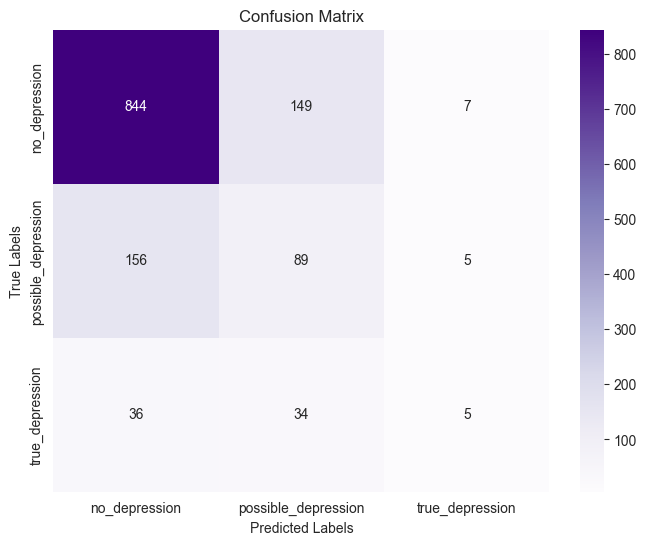

In [9]:
#generate confusion matrix for best parameters

conf_matrix = confusion_matrix(test_labels['label'], predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels = ['no_depression', 'possible_depression', 'true_depression'], yticklabels = ['no_depression', 'possible_depression', 'true_depression'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()